# Results 01 - Reproducing HOTS on Simple Alphabet dataset (aka DVS barrel)

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/antoine/homhots/HOTS/HOTS


In [21]:
import pickle
import os
from Network import network
from Tools import histoscore, netparam

In [22]:
def printfig(fig, name):
    dpi_exp = None
    bbox = 'tight'
    path = '../../paper/5f22d412742c360001c92b46/fig/'
    #path = '../../GrimaldiEtAl2020HOTS_clone_laurent/fig'
    fig.savefig(path+name, dpi = dpi_exp, bbox_inches=bbox, transparent=True)

In [23]:
record_path = '../Records/EXP_01_LagorceKmeans/'
timestr = '2020-12-01'

# Defining the network and training

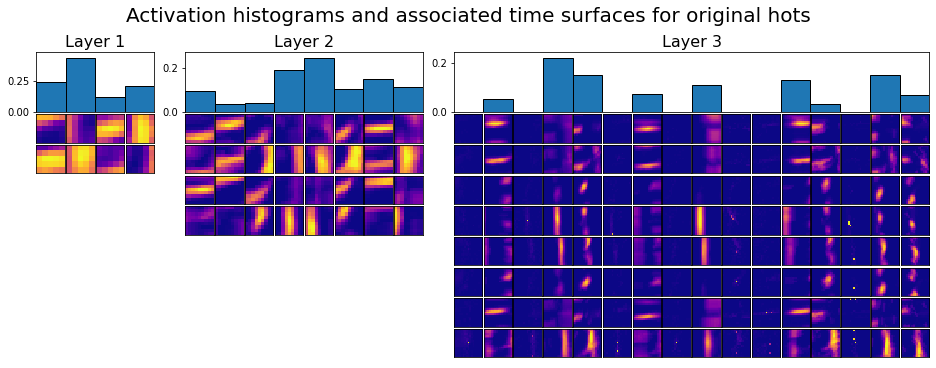

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 98.0% - eucli = 95.0% - norm = 95.0%
Classification scores with entropy: Kullback-Leibler = 92.0% - Jensen-Shannon = 100.0%
Classification scores with k-NN: 3-NN = 35.0% - 6-NN = 12.0%
----------------------------------------------------------------------------------------------------


In [5]:
fname = record_path+"2020-11-26-hots_validation.pkl"
if not os.path.isfile(fname):
    #defining the network
    hots = network(algo='lagorce', krnlinit='first', timestr=timestr)
    #unsupervised clustering
    hots.learninglagorce()
    # learning on training samples
    trainmap = hots.traininglagorce()
    # testing
    testmap = hots.testinglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
hots.plotlayer()
acc = histoscore(trainmap, testmap)

# Adding Homeostasis

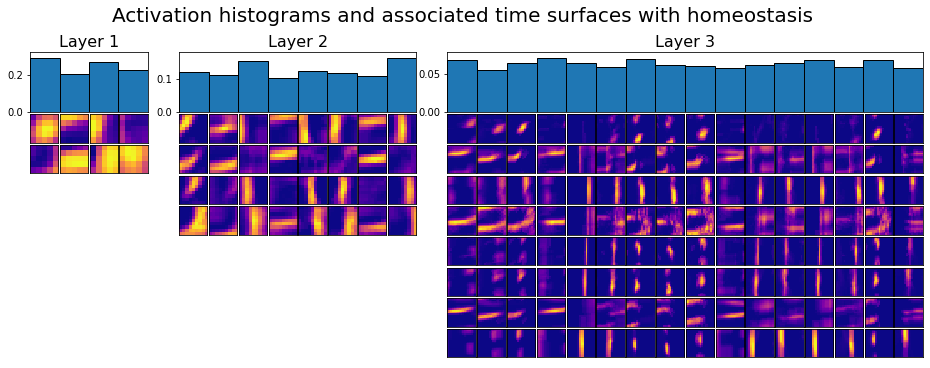

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 98.0% - eucli = 98.0% - norm = 98.0%
Classification scores with entropy: Kullback-Leibler = 98.0% - Jensen-Shannon = 98.0%
Classification scores with k-NN: 3-NN = 30.0% - 6-NN = 12.0%
----------------------------------------------------------------------------------------------------


In [6]:
fname = record_path+"2020-12-01-hots_homeo_randominit.pkl"
if not os.path.isfile(fname):
    homhots = network(algo='lagorce', krnlinit='rdn', homeo=True)
    homhots.learninglagorce()
    trainmaphom = homhots.traininglagorce()
    testmaphom = homhots.testinglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([homhots, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        homhots, trainmaphom, testmaphom = pickle.load(file)
homhots.plotlayer()
acchom = histoscore(trainmaphom, testmaphom)

# Online classification

In [24]:
from Tools import fit_data, predict_data, classification_numbevents, classification_timescale
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
fname = record_path+"train/2020-12-01_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_36_None_LR.pkl"
if not os.path.isfile(fname):
    histomap = homhots.traininglagorce(outstyle = 'LR')
fname = record_path+"test/2020-12-01_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_40_None_LR.pkl"
if not os.path.isfile(fname):
    teststream = homhots.testinglagorce(outstyle = 'LR')

In [9]:
fname = record_path+"train/2020-12-01_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_36_None_LR.pkl"
if not os.path.isfile(fname):
    histomap = hots.traininglagorce(outstyle = 'LR')
fname = record_path+"test/2020-12-01_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_40_None_LR.pkl"
if not os.path.isfile(fname):
    teststream = hots.testinglagorce(outstyle = 'LR')

## As a function of the number of events

In [25]:
num_workers = 0
learning_rate = 0.005
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 5 + 1
print(f'number of epochs: {num_epochs}')
ds_ev = 1
nbclust = [4, 8, 16]
filt = 2
tau = 10
R = 2
sigma = None
homeinv = None
jitter = None
dataset = 'barrel'
nb_train = 36
nb_test = 40
jitonic = None
tau_cla = 50000
namelist = ['raw', 'homhots']
nb_class = 36

number of epochs: 33


In [7]:
for name in namelist:
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_36_40_{ds_ev}.pkl'
    if os.path.isfile(f_name):
        with open(f_name, 'rb') as file:
            likelihood, true_target, time_scale = pickle.load(file)
    else:
        print(f'LR fit for {name}...')
        model, loss  = fit_data(name,timestr,record_path,filt,tau,R,nbclust,sigma,homeinv,jitter,dataset,nb_train, ds_ev,learning_rate,num_epochs,betas,tau_cla,jitonic=jitonic,num_workers=num_workers,verbose=False)
        print(f'prediction for {name}...')
        likelihood, true_target, time_scale = predict_data(model,name,timestr,record_path,filt,tau,R,nbclust,sigma, homeinv, jitter,dataset,nb_test,ds_ev,tau_cla,jitonic=jitonic,num_workers=num_workers, verbose=False)
        with open(f_name, 'wb') as file:
            pickle.dump([likelihood, true_target, time_scale], file, pickle.HIGHEST_PROTOCOL)

/home/antoine/homhots/HOTS/HOTS/Tools.py:565: RuntimeWarning: Mean of empty slice
  maxevac/=nb_test


0 samples where not classified
---------------------------------------------for raw---------------------------------------------
Mean accuracy for raw: 99.7%
Last event accuracy for raw: 100.0%
Accuracy with argmax over the probabilities of a sample for raw: 100.0%
Accuracy when taking the highest counts of classified events for a sample for raw: 100.0%
Accuracy when taking the highest counts of the last 2/3 of classified events for a sample for raw: 100.0%
-----------------------------------------------------------------------------------------------------


/home/antoine/homhots/HOTS/HOTS/Tools.py:565: RuntimeWarning: Mean of empty slice
  maxevac/=nb_test
<ipython-input-49-299351639c84>:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax_onl.axis([0,int(lastev),0,105]);


0 samples where not classified
---------------------------------------------for homhots---------------------------------------------
Mean accuracy for homhots: 99.8%
Last event accuracy for homhots: 100.0%
Accuracy with argmax over the probabilities of a sample for homhots: 100.0%
Accuracy when taking the highest counts of classified events for a sample for homhots: 100.0%
Accuracy when taking the highest counts of the last 2/3 of classified events for a sample for homhots: 100.0%
-----------------------------------------------------------------------------------------------------


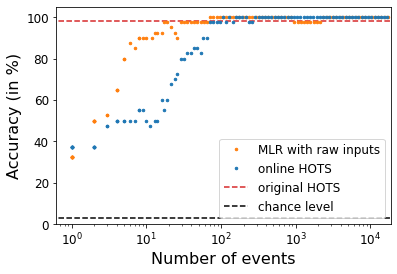

In [49]:
thres = None
namelist = ['raw','homhots']
colorz = ['#ff7f0e','#1f77b4','#d62728']
legend_list = ['original HOTS', 'MLR with raw inputs','online HOTS']
fig_onl, ax_onl = plt.subplots()
for namnum, name in enumerate(namelist):
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_{nb_train}_{nb_test}_{ds_ev}.pkl'
    with open(f_name, 'rb') as file:
        likelihood, true_target, time_scale = pickle.load(file)
    meanac, onlinac, lastac, maxprobac, maxevac, maxevac_end, truepos, falsepos, lastev = classification_numbevents(likelihood, true_target, thres, nb_test, 1/nb_class)
    print(45*'-'+f'for {name}'+45*'-')
    print(f'Mean accuracy for {name}: {np.round(meanac,3)*100}%')
    print(f'Last event accuracy for {name}: {np.round(lastac,3)*100}%')
    print(f'Accuracy with argmax over the probabilities of a sample for {name}: {np.round(maxprobac,3)*100}%')
    print(f'Accuracy when taking the highest counts of classified events for a sample for {name}: {np.round(maxevac,3)*100}%')
    print(f'Accuracy when taking the highest counts of the last 2/3 of classified events for a sample for {name}: {np.round(maxevac_end,3)*100}%')
    print(101*'-')
    sampling = (np.logspace(0,np.log10(lastev),100)).astype(int)
    ax_onl.semilogx(sampling[:-1], onlinac[sampling[:-1]]*100, '.', ms=5, color=colorz[namnum], label = legend_list[namnum+1]);
ax_onl.hlines(98,0,int(lastev), linestyles='dashed', color=colorz[2], label=legend_list[0])
ax_onl.hlines(1/nb_class*100,0,int(lastev), linestyles='dashed', color='k', label='chance level')
ax_onl.axis([0,int(lastev),0,105]);
ax_onl.set_xlabel('Number of events', fontsize=16);
ax_onl.set_ylabel('Accuracy (in %)', fontsize=16);
plt.setp(ax_onl.get_yticklabels(), fontsize=12)
plt.setp(ax_onl.get_xticklabels(), fontsize=12)
#ax_onl.set_title('Accuracy as a function of the number of events', fontsize=16);
ax_onl.legend(fontsize=12, loc='lower right');

In [46]:
printfig(fig_onl, 'barrel_online.pdf')

## As a function of time

/home/antoine/homhots/HOTS/HOTS/Tools.py:618: RuntimeWarning: Mean of empty slice
  falsepos = len(np.where(matscor==0)[0])


0 samples where not classified
0 samples where not classified


/home/antoine/homhots/HOTS/HOTS/Tools.py:618: RuntimeWarning: Mean of empty slice
  falsepos = len(np.where(matscor==0)[0])


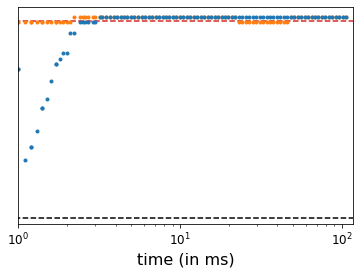

In [50]:
nb_classes = 36
timestep = 100
thres = None
namelist = ['raw','homhots']
legend_list = ['original HOTS','MLR with raw inputs', 'online HOTS']
colorz = ['#ff7f0e','#1f77b4','#d62728']
fig, ax = plt.subplots()
for namnum, name in enumerate(namelist):
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_{nb_train}_{nb_test}_{ds_ev}.pkl'
    with open(f_name, 'rb') as file:
        likelihood, true_target, timescale = pickle.load(file)
    meanac, onlinac, timesteps, lastime, truepos, falsepos = classification_timescale(likelihood, true_target, timescale, timestep, thres, nb_test, 1/nb_classes)
    sampling = (np.logspace(np.log10(np.where(np.round(timesteps)<1000)[0][-1]),np.log10(len(timesteps)),100)).astype(int)
    ax.semilogx(timesteps[sampling[:-2]]/1e3,onlinac[sampling[:-2]]*100, '.', label=legend_list[namnum+1], color = colorz[namnum])
ax.axis([1,lastime/1e3,0,105]);
ax.hlines(98,0,lastime/1e3, linestyles='dashed', color=colorz[2], label=legend_list[0])
ax.hlines(1/nb_classes*100,0,lastime/1e3, linestyles='dashed', color='k', label='chance level')
ax.set_xlabel('time (in ms)', fontsize=16);
ax.set_yticks([])
plt.setp(ax.get_yticklabels(), fontsize=12);
plt.setp(ax.get_xticklabels(), fontsize=12);
#ax.legend(fontsize=12, loc='lower right');

In [51]:
printfig(fig, 'barrel_online_time.pdf')